In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file = os.path.join(dirname, filename)

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Importing necessary libraries.

In [2]:
from tensorflow.keras.layers import Input, Dense, Flatten
from keras import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Sequential

As we are using VGG16 architecture, it expects the size of 224 by 224(Although, you can set your own size). We will set image size.

In [3]:
image_size = [224, 224]

In [4]:
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top =  False)

58892288/58889256 [==============================] - 1s 0us/step


The first argument is the shape of input image plus **3**(as image is colured[RBG], for black_and_white add **1**).
The second one is the weights eqaul to imagenet. And,
as we know it gives 1000 outputs. Third one excludes the top layer.

In [5]:
for layer in vgg.layers:
    layer.trainable = False

Some of the layers of VGG16 are already trained. To train them again is not a good practice. Thereby making it False

In [6]:
from glob import glob
folders = glob('/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/*')

In [7]:
folders


['/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight']

Flattening the output layer

In [8]:
x = Flatten()(vgg.output)

In [9]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [10]:
model = Model(inputs = vgg.input, outputs = prediction)

In [11]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

Compiling the model

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Generating more images

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_data_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [15]:
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [16]:
train_set = train_data_gen.flow_from_directory('/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [17]:
test_set = test_data_gen.flow_from_directory('/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/valid/', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


Fitting the model

In [18]:
mod = model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Epoch 1/10
574/574 [==============================] - 348s 607ms/step - loss: 0.7429 - accuracy: 0.7550 - val_loss: 0.5166 - val_accuracy: 0.8349
Epoch 2/10
574/574 [==============================] - 278s 485ms/step - loss: 0.4366 - accuracy: 0.8546 - val_loss: 0.4244 - val_accuracy: 0.8637
Epoch 3/10
574/574 [==============================] - 278s 484ms/step - loss: 0.3265 - accuracy: 0.8908 - val_loss: 0.5408 - val_accuracy: 0.8262
Epoch 4/10
574/574 [==============================] - 279s 487ms/step - loss: 0.2932 - accuracy: 0.9013 - val_loss: 0.2751 - val_accuracy: 0.9115
Epoch 5/10
574/574 [==============================] - 279s 486ms/step - loss: 0.2678 - accuracy: 0.9112 - val_loss: 0.4205 - val_accuracy: 0.8713
Epoch 6/10
574/574 [==============================] - 277s 483ms/step - loss: 0.2279 - accuracy: 0.9236 - val_loss: 0.2437 - val_accuracy: 0.9250
Epoch 7/10
574/574 [==============================] - 286s 498ms/step - loss: 0.2140 - accuracy: 0.9295 - val_loss: 0.4696 -

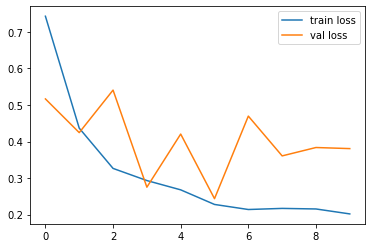

In [19]:
import matplotlib.pyplot as plt
plt.plot(mod.history['loss'], label='train loss')
plt.plot(mod.history['val_loss'], label='val loss')
plt.legend()
plt.show()



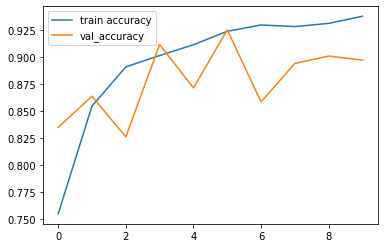

In [20]:
plt.plot(mod.history['accuracy'], label='train accuracy')
plt.plot(mod.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()